# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Хрулева Елена
## ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

---

**Задача генерации текстов**

N. [Набор данных "Сказки"]() `fairytales.txt`

# 0. Инициализация библиотек

In [ ]:
import warnings
import random
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import collections

warnings.filterwarnings("ignore")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [ ]:
cats = ('Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair',
        'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll',
        'Russian Blue', 'Siamese', 'Sphynx')

dogs = ('American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle',
        'Boxer', 'Chihuahua', 'English Cocker Spaniel', 'English Setter',
        'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin',
        'Keeshond', 'Leonberger', 'Miniature Pinscher', 'Newfoundland',
        'Pomeranian', 'Pug', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
        'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier')

all_classes = ('Abyssinian', 'American Bulldog', 'American Pit Bull Terrier',
               'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer',
               'British Shorthair', 'Chihuahua', 'Egyptian Mau',
               'English Cocker Spaniel', 'English Setter', 'German Shorthaired',
               'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond',
               'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland',
               'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue',
               'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
               'Siamese', 'Sphynx', 'Staffordshire Bull Terrier',
               'Wheaten Terrier', 'Yorkshire Terrier')

In [ ]:
classic_transform =  torchvision.transforms.Compose([
    torchvision.transforms.Resize((80, 80)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

In [ ]:
target_transform = lambda t: 1 if all_classes[t] in cats else 0

In [ ]:
train_dataset = torchvision.datasets.OxfordIIITPet(root="oxford_pet",
                                                   split="trainval",
                                                   download=True,
                                                   transform=classic_transform)
test_dataset = torchvision.datasets.OxfordIIITPet(root="oxford_pet",
                                                  split="test",
                                                  download=True,
                                                  transform=classic_transform,
                                                  target_transform=target_transform)

## 1.2 Предобработка данных (по необходимости)

In [ ]:
idx_to_class = {idx: name for name, idx in train_dataset.class_to_idx.items()}

CATS_TRAIN, DOGS_TRAIN = list(), list()
for x_sample, y_sample in train_dataset:
    if idx_to_class[y_sample] in cats:
        CATS_TRAIN.append(x_sample)
    else:
        DOGS_TRAIN.append(x_sample)

print(f"Собак в датасете: {len(DOGS_TRAIN) / len(train_dataset)}")
print("Значит модель с таким качеством просто выдает константу")
print("Нужно провести балансировку данных, длагодаря чему добиться более высокого качества")

Собак в датасете: 0.6771739130434783
Значит модель с таким качеством просто выдает константу
Нужно провести балансировку данных, длагодаря чему добиться более высокого качества


In [ ]:
DOGS_INDICES = [i for i in range(len(DOGS_TRAIN))]
CATS_INDICES = [i for i in range(len(CATS_TRAIN))]

def get_random_batch(batch_size: int = 20):
    dog_indices = random.choices(DOGS_INDICES, k=batch_size // 2)
    cat_indices = random.choices(CATS_INDICES, k=batch_size // 2)

    x, y = list(), list()
    for i in range(batch_size // 2):
        x.append(DOGS_TRAIN[dog_indices[i]])
        x.append(CATS_TRAIN[cat_indices[i]])

        y.append([0])
        y.append([1])
    
    x = [t.numpy() for t in x]
    return torch.Tensor(x).to(device), torch.Tensor(y).to(device)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20, shuffle=True, num_workers=2)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [ ]:
class CNNModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_1 = torch.nn.Conv2d(1, 60, 3)
        self.batch_1 = torch.nn.BatchNorm2d(60)
        self.conv_2 = torch.nn.Conv2d(60, 120, 3)
        self.batch_2 = torch.nn.BatchNorm2d(120)
        self.conv_3 = torch.nn.Conv2d(120, 180, 3)
        self.batch_3 = torch.nn.BatchNorm2d(180)
        self.conv_4 = torch.nn.Conv2d(180, 240, 1)
        

        self.flatten = torch.nn.Flatten()
        self.batch_4 = torch.nn.BatchNorm1d(240)
        self.lin_1 = torch.nn.Linear(240, 120)
        self.batch_5 = torch.nn.BatchNorm1d(120)
        self.lin_2 = torch.nn.Linear(120, 12)
        self.batch_6 = torch.nn.BatchNorm1d(12)
        self.lin_3 = torch.nn.Linear(12, 1)

        self.activ = torch.nn.ELU()
        self.max_pool = torch.nn.MaxPool2d(4, 4)
        self.max_pool_2 = torch.nn.MaxPool2d(2, 2)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.max_pool(self.activ(self.conv_1(x)))
        x = self.dropout(self.batch_1(x))
        x = self.max_pool(self.activ(self.conv_2(x)))
        x = self.dropout(self.batch_2(x))
        x = self.max_pool_2(self.activ(self.conv_3(x)))
        x = self.dropout(self.batch_3(x))
        x = self.dropout(self.activ(self.conv_4(x)))

        x = self.lin_1(self.batch_4(self.flatten(x)))
        x = self.lin_2(self.dropout(self.batch_5(self.activ(x))))
        x = self.lin_3(self.dropout(self.batch_6(self.activ(x))))

        return self.sigmoid(x)

## 1.4 Обучение сввёрточной нейронной сети для решения задачи классификации

In [ ]:
def train(model, optimizer, criterion, test_loader, n_epoch):
    train_loss, test_loss = list(), list()
    train_acc, test_acc = list(), list()

    for epoch in range(n_epoch):
        model.train()

        loss = 0
        num_true, num_all = 0, 0
        for _ in range(90):
            optimizer.zero_grad()

            x_batch, y_batch = get_random_batch(20)
            y_pred = model.forward(x_batch)
            batch_loss = criterion(y_pred, y_batch)
            loss += batch_loss.item()
            batch_loss.backward()
            optimizer.step()

            y_pred = torch.round(y_pred)
            num_true += (y_pred == y_batch).sum().item()
            num_all += y_batch.size(0)
        train_loss.append(loss / (90 * 20))
        train_acc.append(num_true / num_all)

        model.eval()
        loss = 0
        num_true, num_all = 0, 0
        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.unsqueeze(1).float().to(device)
                y_pred = model.forward(x_batch)
                batch_loss = criterion(y_pred, y_batch)
                loss += batch_loss.item()

                y_pred = torch.round(y_pred)
                num_true += (y_pred == y_batch).sum().item()
                num_all += y_batch.size(0)
        test_loss.append(loss / len(test_loader))
        test_acc.append(num_true / num_all)
    return (train_loss, test_loss, train_acc, test_acc)

In [ ]:
criterion = torch.nn.BCELoss()
model = CNNModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
class_train_loss, class_test_loss, class_train_acc, class_test_acc = train(model, optimizer, criterion, test_loader, n_epoch=80)

## 1.5 Агументация данных и регулряизации нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [ ]:
aug_transform =  torchvision.transforms.Compose([
    torchvision.transforms.Resize((80, 80)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.RandomRotation(20),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

In [ ]:
train_dataset = torchvision.datasets.OxfordIIITPet(root="oxford_pet",
                                                   split="trainval",
                                                   download=True,
                                                   transform=aug_transform)
test_dataset = torchvision.datasets.OxfordIIITPet(root="oxford_pet",
                                                  split="test",
                                                  download=True,
                                                  transform=aug_transform,
                                                  target_transform=target_transform)

idx_to_class = {idx: name for name, idx in train_dataset.class_to_idx.items()}

CATS_TRAIN, DOGS_TRAIN = list(), list()
for x_sample, y_sample in train_dataset:
    if idx_to_class[y_sample] in cats:
        CATS_TRAIN.append(x_sample)
    else:
        DOGS_TRAIN.append(x_sample)

DOGS_INDICES = [i for i in range(len(DOGS_TRAIN))]
CATS_INDICES = [i for i in range(len(CATS_TRAIN))]
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20, shuffle=True, num_workers=2)

## 1.6 Обучение нейросети на данных с аугументацией 

In [ ]:
model = CNNModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
aug_train_loss, aug_test_loss, aug_train_acc, aug_test_acc = train(model, optimizer, criterion, test_loader, n_epoch=80)

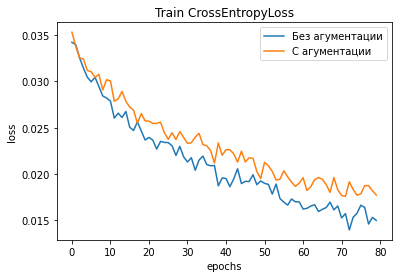

In [ ]:
plt.plot(class_train_loss, label="Без агументации")
plt.plot(aug_train_loss, label="С агументации")
plt.title("Train CrossEntropyLoss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

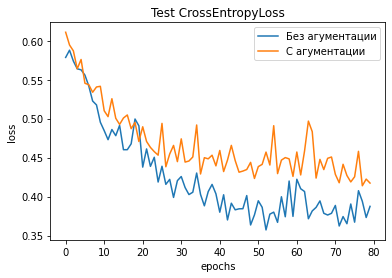

In [ ]:
plt.plot(class_test_loss, label="Без агументации")
plt.plot(aug_test_loss, label="С агументации")
plt.title("Test CrossEntropyLoss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

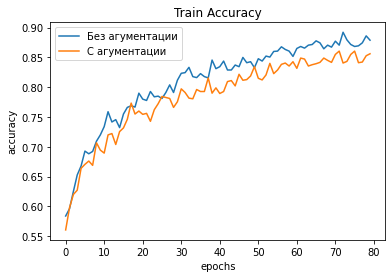

In [ ]:
plt.plot(class_train_acc, label="Без агументации")
plt.plot(aug_train_acc, label="С агументации")
plt.title("Train Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

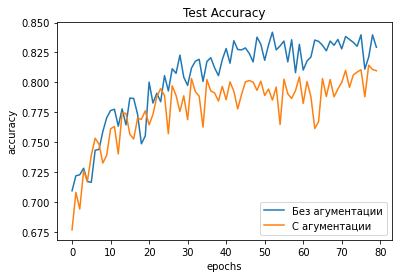

In [ ]:
plt.plot(class_test_acc, label="Без агументации")
plt.plot(aug_test_acc, label="С агументации")
plt.title("Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
print("С агументацией")
print(f"Train loss: {round(min(aug_train_loss), 4)}")
print(f"Test  loss: {round(min(aug_test_loss), 4)}")
print(f"Train acc:  {round(max(aug_train_acc), 4)}")
print(f"Test  acc:  {round(max(aug_test_acc), 4)}")

С агументацией
Train loss: 0.0176
Test  loss: 0.4139
Train acc:  0.8606
Test  acc:  0.8144


In [ ]:
print("Без агументацией")
print(f"Train loss: {round(min(class_train_loss), 4)}")
print(f"Test  loss: {round(min(class_test_loss), 4)}")
print(f"Train acc:  {round(max(class_train_acc), 4)}")
print(f"Test  acc:  {round(max(class_test_acc), 4)}")

Без агументацией
Train loss: 0.0139
Test  loss: 0.3572
Train acc:  0.8922
Test  acc:  0.8419


## 1.7 Выводы

Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

В задании 1.3 выбор пал на архитектуру с регуляцией, так как без нее модель сразу переобучалась.

Более сильная агументация дает слишком большую разницу между train и test выборками, из-за чего значительная разница качества модели на при обучении на данных с агументацией и без. Поэтому была добавлена легкая агументация - сгвиг изображения на случайный градус влево и вправо (кручение изображения).

Однако с такой агументацией модель без нее показала лучшее качество на test-выборке: Accuracy = 84.08%.

Это в архитектуре с ограничением в использовании conv-слоев по количеству - хороший результат.

Увеличив количество conv-слоев и используя другие архитектурные приемы, можно повысить качество. В более сложной модели агументация данных дала бы прирост в качестве на test-выборке.